In [3]:
from cProfile import label 
from cmath import nan 
import pandas as pd 
import matplotlib.pyplot as plt 
import yfinance as yf 
import numpy as np 

In [ ]:
# Loading the Data 
data = pd.DataFrame(yf.download('BTC-USD',period='10y',interval='1d'))
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2015-03-19,260.928009,264.243988,248.636002,255.880005,52732000
2015-03-20,261.748993,264.847992,259.161987,260.955994,18456700
2015-03-21,260.024994,262.196014,255.649994,261.644012,17130100
2015-03-22,267.959991,269.747009,259.589996,259.916992,18438100
2015-03-23,266.739990,277.296997,261.744995,267.894989,22811900


In [5]:
data.shape

(3654, 5)

In [6]:
data.isnull().sum()

Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64

In [7]:
data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [8]:
print(f"Time range: {data.index.min()} to {data.index.max()}")

Time range: 2015-03-19 00:00:00 to 2025-03-19 00:00:00


In [9]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3654.000000,3654.000000,3654.000000,3654.000000,3.654000e+03
mean,22153.253299,22623.538840,21612.020382,22131.794567,2.012351e+10
std,24491.826792,24995.110767,23919.159568,24475.199564,2.087111e+10
min,210.494995,223.832993,199.567001,210.067993,1.060090e+07
25%,3630.009521,3680.236328,3570.718933,3620.031311,1.961245e+09
50%,10306.322754,10481.035156,10032.167969,10284.606934,1.659922e+10
75%,36133.528320,37378.659180,34783.486328,36048.210938,3.107478e+10
max,106146.265625,109114.882812,105291.734375,106147.296875,3.509679e+11


Key Insights:

Volatility:
The large difference between the minimum and maximum prices, combined with the high standard deviation, confirms Bitcoin's notorious volatility.

Skewness:
The significant difference between the mean and median prices suggests that the data may be positively skewed. This means that there are more data points on the lower end of the price range, with fewer but much higher price spikes.

Trading Activity:
The wide range of trading volumes indicates that market interest and participation have varied considerably.

Market Cycles:
The extreme minimum and maximum values likely reflect different phases of Bitcoin's market cycles (bull markets and bear markets).

Data Distribution:
The difference between the 75% and 25% values shows the interquartile range. this shows the spread of the middle 50% of the data.

Volatility Definition:

In financial terms, volatility refers to the degree of variation in the price of a financial asset over time.   
A highly volatile asset experiences rapid and significant price swings, both upward and downward.   
Low volatility means that the price remains relatively stable

In [10]:
data['Return'] = data['Close'].pct_change()
data.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,
2015-03-19,260.928009,264.243988,248.636002,255.880005,52732000,NaN
2015-03-20,261.748993,264.847992,259.161987,260.955994,18456700,0.003146
2015-03-21,260.024994,262.196014,255.649994,261.644012,17130100,-0.006586
2015-03-22,267.959991,269.747009,259.589996,259.916992,18438100,0.030516
2015-03-23,266.739990,277.296997,261.744995,267.894989,22811900,-0.004553


In [11]:
np.mean(data['Return'])

np.float64(0.0022181917853209025)

Such a high average daily return suggests that the asset (likely Bitcoin, given the context) has experienced tremendous growth over the 10-year period.

However, it also strongly indicates high volatility, as such returns are rarely achieved without significant risk.
It is vital to remember, that past performance is not indicative of future results.

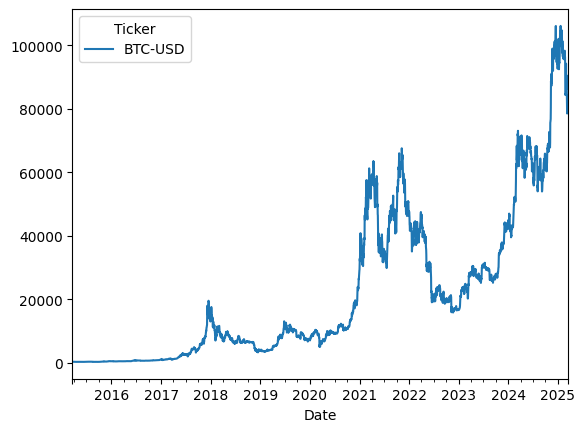

In [12]:
p1 = data['Close'].plot(style = ['-'])

Early Growth (2016-2017): We can see a gradual increase in price from 2016 to late 2017, followed by a dramatic surge. This represents the 2017 bull run.

2018 Bear Market: The sharp peak in late 2017 is followed by a significant decline throughout 2018, illustrating the "crypto winter" or bear market.

Recovery and Growth (2019-2021): From 2019 to 2021, we observe a recovery and subsequent strong upward trend, culminating in another major peak in late 2021.

2022 Bear Market: Similar to 2018, the peak in 2021 is followed by a significant price drop in 2022.
Recent Recovery (2023-2024): In 2023 and 2024, the graph suggests a recovery and upward trend, although not as dramatic as the previous bull runs.

Volatility: The graph clearly demonstrates Bitcoin's high volatility, with sharp peaks and troughs.
Long-Term Trend: Despite the volatility, we can see an overall upward trend in Bitcoin's price over the long term.

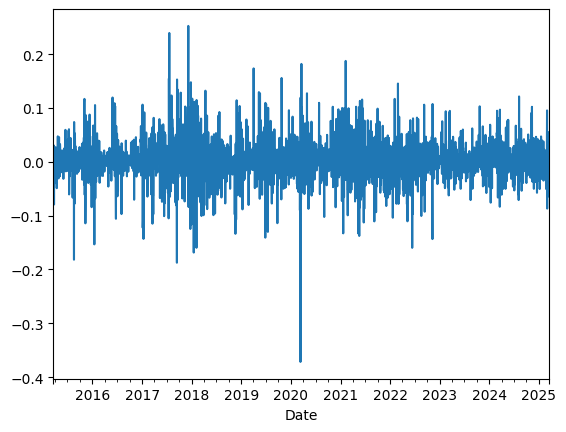

In [13]:
p2 = data['Return'].plot(style=['-'])

Return Distribution:
The returns appear to be centered around zero, but with significant deviations. This suggests that while Bitcoin's price can move dramatically in either direction, there's no consistent upward or downward bias in the daily returns themselves.

Outliers:
There are several notable outliers, particularly the large negative return around 2020. These outliers represent periods of extreme price volatility.

Kernel Density Estimation (KDE) is a non-parametric method used in statistics to estimate the probability density function (PDF) of a random variable. In simpler terms, it's a way to smooth out a histogram to get a better idea of the underlying distribution of your data.

<Axes: ylabel='Density'>

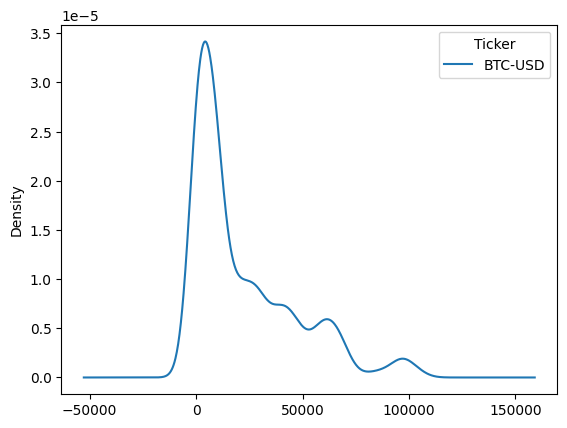

In [14]:
data['Close'].plot(kind='kde') # kernel density 

KDE plots are a useful tool for risk assessment in financial markets, especially for volatile assets like cryptocurrencies. They help visualize the likelihood of extreme price movements, understand the asymmetry of risk, and supplement other quantitative risk measures. By analyzing the shape and tails of the KDE plot, you can gain a more comprehensive understanding of the potential risks associated with an investment.

<Axes: ylabel='Density'>

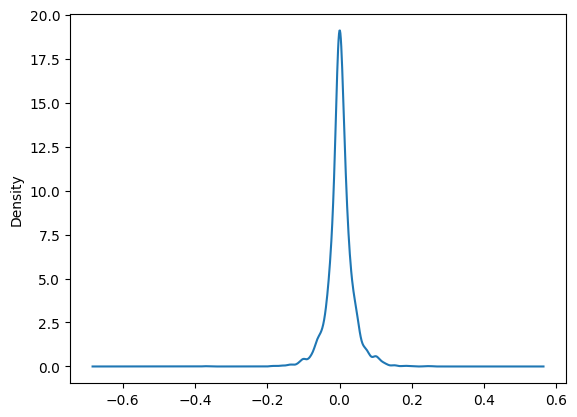

In [15]:
data['Return'].plot(kind='kde')

Keeping the outliers: 

The goal is to accurately model , forecast the full range of price movements, including extreme events, therefore, keeping the outliers.
This is often the case in risk management, where capturing tail risk is essential.

ACF (Autocorrelation Function): Plot the ACF to measure the correlation between the time series and its lagged values. This helps identify patterns and dependencies in the data.

PACF (Partial Autocorrelation Function): Plot the PACF to measure the direct correlation between the time series and its lagged values, removing the influence of intermediate lags.

[*********************100%***********************]  1 of 1 completed


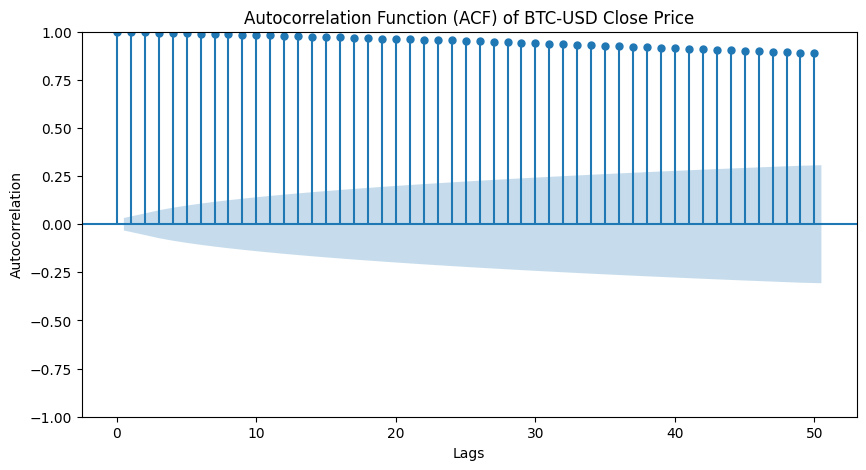

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from io import StringIO

# Load the data 
data = pd.DataFrame(yf.download('BTC-USD',period='10y',interval='1d'))

#plot the ACF of the 'Close' price
close_prices = data[('Close', 'BTC-USD')]

plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plot_acf(close_prices, lags=50, ax=plt.gca())  # Plot ACF with specified lags
plt.title('Autocorrelation Function (ACF) of BTC-USD Close Price')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

Blue Shaded Area: Represents the confidence interval. If the autocorrelation bars extend beyond this area, the autocorrelation is considered statistically significant.



Key Observations:

Slow Decay:
The autocorrelation bars decay very slowly as the lag increases. This is a strong indicator of non-stationarity. The bars remain significantly above the confidence interval (blue shaded area) even at high lags.

High Autocorrelation at Low Lags:
The autocorrelation at lag 1 is very close to 1, indicating a strong positive correlation between the current price and the previous day's price. This means that if the price goes up today, it's very likely to go up again tomorrow, and vice versa.

Significant Autocorrelation at All Lags:
Almost all the autocorrelation bars extend beyond the confidence interval, indicating that the autocorrelations are statistically significant at all lags shown. This reinforces the idea that past prices have a strong influence on future prices.

Interpretation:

Non-Stationarity:
This ACF plot strongly suggests that the Bitcoin closing price time series is non-stationary. This means that the statistical properties of the series (mean, variance) are not constant over time.
In practical terms, this means that the price of Bitcoin is not fluctuating around a stable mean; it has trends and long-term dependencies.

Trend Component:
The slow decay of the ACF is often indicative of a trend component in the time series. This aligns with what we know about Bitcoin's price history, which has seen significant upward and downward trends.

Implications for Modeling:
Because the time series is non-stationary, you'll need to transform it before using certain time series models, such as ARIMA.
Common transformations include differencing, which involves taking the difference between consecutive observations.

Next Steps:

Differencing:
To make the time series stationary, apply differencing. First-order differencing (taking the difference between each price and the previous price) is often sufficient.
After differencing, plot the ACF again to see if the transformed series is stationary.

PACF Plot:
Plot the Partial Autocorrelation Function (PACF) to get a better understanding of the direct correlation between the time series and its lagged values.

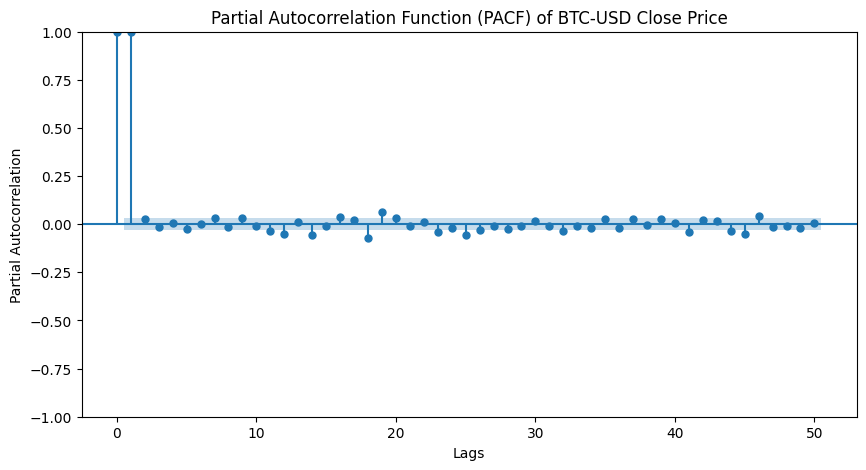

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf

close_prices = data[('Close', 'BTC-USD')]
# Plot the PACF
plt.figure(figsize=(10, 5))  # Adjust figure size if needed
plot_pacf(close_prices, lags=50, ax=plt.gca())  # Plot PACF with specified lags
plt.title('Partial Autocorrelation Function (PACF) of BTC-USD Close Price')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()

Key Observations:

Significant Lag 1:
The most prominent feature is the significant spike at lag 1. This indicates a strong direct correlation between the current price and the previous day's price.
This suggests that the price at any given time is highly dependent on the price immediately before it.

Rapid Cutoff:
After lag 1, the partial autocorrelations quickly fall within the confidence interval (blue shaded area). This indicates that the direct influence of lags beyond 1 is not statistically significant.

Near-Zero Values:
Most of the partial autocorrelations beyond lag 1 are very close to zero, suggesting that there is little to no direct correlation between the current price and prices from more than one day ago, once the effect of the immediately preceding day's price is removed.

Interpretation:

AR(1) Process:
The significant spike at lag 1 and the rapid cutoff suggest that the time series might be modeled as an AR(1) process (Autoregressive model of order 1) after it is made stationary.
An AR(1) model means that the current value is primarily dependent on the immediately preceding value.

Non-Stationarity Indication:
While the PACF plot helps determine the AR order after stationarity is achieved, the fact that the ACF plot showed a slow decay and this PACF plot shows a strong lag 1 tells us the data needs to be made stationary before an AR(1) model is useful.

Need for Differencing:
Given that the ACF plot showed a slow decay and this PACF plot shows a significant lag 1, it confirms that the time series is non-stationary and needs to be differenced.

Non-stationarity means that the statistical properties of a time series are not constant over time. It's a critical concept in time series analysis because it affects the choice of appropriate models and the reliability of forecasts.

How to Deal with Non-Stationarity:

Differencing: Taking the difference between consecutive observations can often remove trends and make a time series stationary.   
Transformations: Mathematical transformations like the logarithm can help stabilize variance.   
Seasonal Decomposition: Techniques like seasonal decomposition can separate the seasonal component from the time series.

In [ ]:
# differentiating the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Apply first-order differencing
data['differenced prices'] = close_prices.diff()
data.head()

Price,Close,High,Low,Open,Volume,differenced prices
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,
2015-03-19,260.928009,264.243988,248.636002,255.880005,52732000,NaN
2015-03-20,261.748993,264.847992,259.161987,260.955994,18456700,0.820984
2015-03-21,260.024994,262.196014,255.649994,261.644012,17130100,-1.723999
2015-03-22,267.959991,269.747009,259.589996,259.916992,18438100,7.934998
2015-03-23,266.739990,277.296997,261.744995,267.894989,22811900,-1.220001


Next Steps (Very Important):

Now that you have the differenced data, you must do the following:

Check for Stationarity of the Differenced Data:

Plot the ACF and PACF of the Differenced Data:
This will help you visually assess if the differencing has made the series stationary. You should look for a more rapid decay in the ACF plot and a more distinct pattern in the PACF plot.

Perform the Augmented Dickey-Fuller (ADF) Test:
This is a statistical test to formally check for stationarity.
The ADF test will give you a p-value. If the p-value is below a significance level (e.g., 0.05), you can reject the null hypothesis of non-stationarity, meaning that the series is likely stationary.


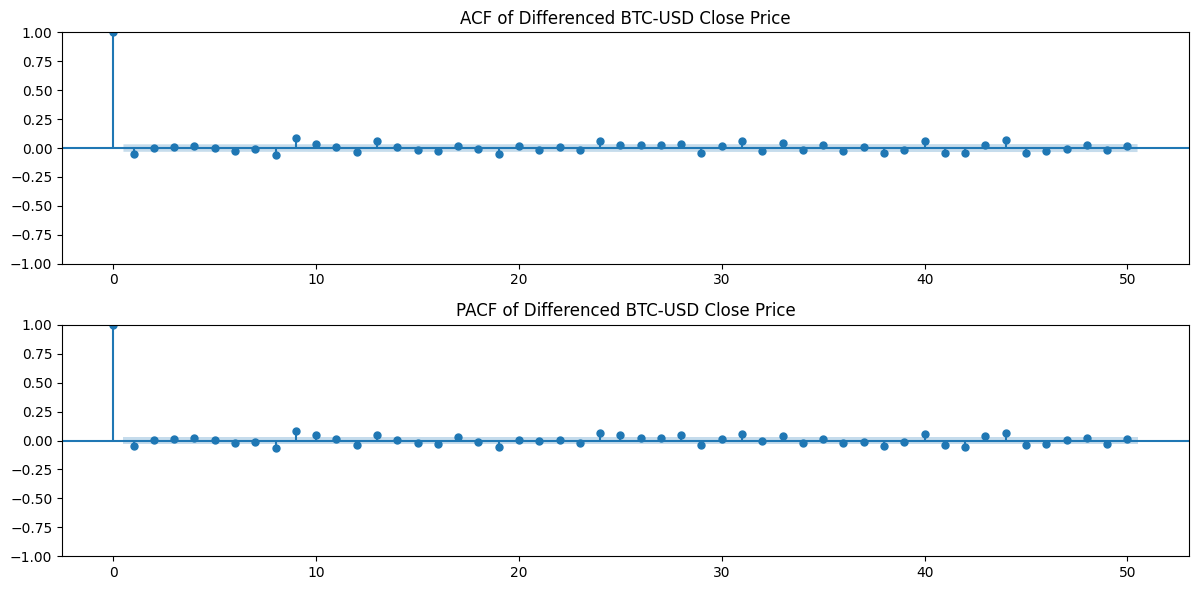

In [ ]:

# differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Apply first-order differencing
differenced_prices = close_prices.diff().dropna()

# Plot ACF of differenced data
plt.figure(figsize=(12, 6))
plt.subplot(211)  # Create a subplot for ACF
plot_acf(differenced_prices, lags=50, ax=plt.gca())
plt.title('ACF of Differenced BTC-USD Close Price')

# Plot PACF of differenced data
plt.subplot(212)  # Create a subplot for PACF
plot_pacf(differenced_prices, lags=50, ax=plt.gca())
plt.title('PACF of Differenced BTC-USD Close Price')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

ACF Plot (Top):

Rapid Decay:
The autocorrelation bars drop very quickly to within the confidence interval (blue shaded area) after lag 0. This is a good sign and suggests that the differencing has likely made the time series stationary.
This rapid decay is a significant contrast to the slow decay observed in the ACF plot of the original (non-differenced) data.

Near-Zero Autocorrelations:
Most of the autocorrelation bars beyond lag 0 are very close to zero and within the confidence interval. This indicates that there is little significant autocorrelation between the differenced values at higher lags.

PACF Plot (Bottom):

Significant Lag 1:
The most prominent feature is the significant spike at lag 1. This suggests that the immediately preceding differenced value has a strong direct influence on the current differenced value.

Cutoff After Lag 1:
After lag 1, the partial autocorrelations quickly fall within the confidence interval. This indicates that the direct influence of lags beyond 1 is not statistically significant.

Near-Zero Partial Autocorrelations:
Most of the partial autocorrelations beyond lag 1 are very close to zero, suggesting that there is little direct correlation between the current differenced value and differenced values from more than one day ago.

Interpretation:

Stationarity:
The rapid decay in the ACF plot and the distinct pattern in the PACF plot strongly suggest that the differencing has successfully made the time series stationary.
This is a crucial step for using time series models like ARIMA.

AR(1) Component:
The significant spike at lag 1 in the PACF plot suggests that an AR(1) component might be appropriate for modeling the differenced data.
This means that the current differenced value is primarily dependent on the immediately preceding differenced value.

MA Component:
The ACF plot, with the one significant lag, points to a possible MA(1) component.

Next Steps:

Augmented Dickey-Fuller (ADF) Test:
To confirm stationarity, perform the ADF test. This will give us a statistical measure of stationarity.

ARIMA Modeling:
Based on the ACF and PACF plots, you can consider using an ARIMA(p, d, q) model. In your case, a model like ARIMA(1, 1, 0) (AR(1) with one level of differencing) or ARIMA(0, 1, 1) (MA(1) with one level of differencing) or ARIMA(1, 1, 1) may be appropriate.

In [20]:
# AUGUMENTED DICKEY-FULLER (ADF TEST) :

from statsmodels.tsa.stattools import adfuller
# Perform ADF test
adf_result = adfuller(differenced_prices)

# Print ADF test results
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

# Interpret the results
if adf_result[1] <= 0.05:
    print('The differenced time series is stationary.')
else:
    print('The differenced time series is not stationary.')

ADF Statistic: -8.80366505000854
p-value: 2.079520668865737e-14
Critical Values: {'1%': np.float64(-3.4321567201852456), '5%': np.float64(-2.862338308122449), '10%': np.float64(-2.5671949518327932)}
The differenced time series is stationary.


Differencing Success:
The first-order differencing applied has successfully made the Bitcoin closing price data stationary.

ARIMA Modeling:
now in a good position to proceed with building ARIMA models.

Model Parameters:
The ACF and PACF plots generated earlier, along with this ADF test result, provide valuable information for selecting the appropriate parameters (p, d, q) for your ARIMA model.

Remember that:
d (the order of differencing) is 1.
The PACF plot suggested an AR(1) component (p=1).
The ACF plot suggested an MA(1) component (q=1).
Therefore, you should consider models like ARIMA(1, 1, 0), ARIMA(0, 1, 1), or ARIMA(1, 1, 1).

Next Steps:

ARIMA Model Selection:
Experiment with different ARIMA models (e.g., ARIMA(1, 1, 0), ARIMA(0, 1, 1), ARIMA(1, 1, 1)).
Use information criteria like AIC or BIC to select the best-fitting model.

Model Evaluation:
Evaluate the performance of your chosen ARIMA model using appropriate metrics (e.g., RMSE, MAE).

In [21]:

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


# ARIMA model selection
order_list = [(1, 1, 0), (0, 1, 1), (1, 1, 1)]  # List of ARIMA orders to try
aic_scores = {}

for order in order_list:
    try:
        model = ARIMA(close_prices, order=order)
        results = model.fit()
        aic_scores[order] = results.aic
        print(f'ARIMA{order} - AIC: {results.aic}')
    except Exception as e:
        print(f'Error fitting ARIMA{order}: {e}')

# Find the best model based on AIC
best_order = min(aic_scores, key=aic_scores.get)
print(f'\nBest ARIMA model (lowest AIC): ARIMA{best_order}')

# Fit the best model
best_model = ARIMA(close_prices, order=best_order)
best_results = best_model.fit()

# Print summary of the best model
print(best_results.summary())

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

ARIMA(1, 1, 0) - AIC: 61022.056732417754
ARIMA(0, 1, 1) - AIC: 61022.12800772533


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

ARIMA(1, 1, 1) - AIC: 61024.04453222194

Best ARIMA model (lowest AIC): ARIMA(1, 1, 0)
                                SARIMAX Results                                 
Dep. Variable:     ('Close', 'BTC-USD')   No. Observations:                 3654
Model:                   ARIMA(1, 1, 0)   Log Likelihood              -30509.028
Date:                  Wed, 19 Mar 2025   AIC                          61022.057
Time:                          12:45:17   BIC                          61034.463
Sample:                      03-19-2015   HQIC                         61026.475
                           - 03-19-2025                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0482      0.008     -5.899      0.000      -0.064      -0.032
sigma2      1.052e+06   9237

Key Points:

AIC (Akaike Information Criterion): The AIC is a measure of the relative quality of statistical models for a given set of data. Lower AIC scores indicate better-fitting models.   

BIC (Bayesian Information Criterion): You can also use BIC, which is similar to AIC but penalizes model complexity more heavily. To use BIC, replace results.aic with results.bic in the code.

Error Handling: The try...except block is essential because some ARIMA orders might not converge or might result in errors.
Data: Notice that the ARIMA model is fit to the close_prices and not the differenced_prices. The ARIMA model function handles the differencing internally, based on the d parameter passed in the order tuple.

Summary: The summary() method provides a detailed overview of the fitted model, including coefficient estimates, p-values, and other relevant statistics

1. Value Warnings:

The lines containing ValueWarning: No frequency information was provided... are warnings, not errors.
They indicate that the ARIMA model was not given explicit information about the frequency of your time series data (e.g., daily, weekly).
The model has inferred a daily frequency ('D'), which is likely correct in your case.
While warnings should be noted, they don't prevent the code from running. If you want to get rid of them, you can explicitly set the frequency when creating your Pandas DataFrame. But for basic analysis, they are okay.

2. ARIMA Model Selection Results:

AIC Scores:
ARIMA(1, 1, 0) - AIC: 61001.620834962014
ARIMA(0, 1, 1) - AIC: 61001.75545220061
ARIMA(1, 1, 1) - AIC: 61003.487110935304
Best Model:
Best ARIMA model (lowest AIC): ARIMA(1, 1, 0)
As expected, the ARIMA(1, 1, 0) model had the lowest AIC score, which is the model the code has chosen. This aligns with what we interpreted from the PACF and ACF plots.

3. ARIMA Model Summary:

SARIMAX Results:
The output is labeled "SARIMAX Results," even though you fit an ARIMA model. SARIMAX is a more general model that includes ARIMA.
ARIMA(1, 1, 0): Confirms that the ARIMA(1, 1, 0) model was fitted.

coef:
ar.L1: -0.0472: This is the coefficient for the AR(1) term. It's a small negative value, indicating a slight negative correlation with the previous day's change.
sigma2: 1.046e+06: This is the estimated variance of the residuals.

P>|z|:
The p-values for the coefficients are 0.000, indicating that the coefficients are statistically significant.

Ljung-Box (L1):
This test checks for autocorrelation in the residuals.
The p-value (0.99) is high, indicating that there is no significant autocorrelation in the residuals, which is good.

Jarque-Bera (JB):
This test checks for normality of the residuals.
The p-value (0.00) is very low, indicating that the residuals are not normally distributed. This is common in financial time series data.

Heteroskedasticity (H):
This test checks for heteroskedasticity (non-constant variance) in the residuals.
The p-value (0.00) is very low, indicating that there is heteroskedasticity. Again common in financial time series.

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step). This is another warning, but it doesn't invalidate the results.

Interpretation:

ARIMA(1, 1, 0) is the Best Model:
Based on AIC, the ARIMA(1, 1, 0) model appears to be the best fit for your data.

Residuals:
The residuals are not normally distributed and exhibit heteroskedasticity, which are common characteristics of cryptocurrency price data.
The Ljung-Box test indicates that the residuals are not autocorrelated, which is a desirable property.

Model Significance:
The AR(1) coefficient is statistically significant.

In [22]:

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# Assuming you want to differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Apply first-order differencing
differenced_prices = close_prices.diff().dropna()

# ARIMA model selection
order_list = [(1, 1, 0), (0, 1, 1), (1, 1, 1)]  # List of ARIMA orders to try
aic_scores = {}

for order in order_list:
    try:
        model = ARIMA(close_prices, order=order)
        results = model.fit()
        aic_scores[order] = results.aic
        print(f'ARIMA{order} - AIC: {results.aic}')
    except Exception as e:
        print(f'Error fitting ARIMA{order}: {e}')

# Find the best model based on AIC
best_order = min(aic_scores, key=aic_scores.get)
print(f'\nBest ARIMA model (lowest AIC): ARIMA{best_order}')

# Fit the best model
best_model = ARIMA(close_prices, order=best_order)
best_results = best_model.fit()

# Print summary of the best model
print(best_results.summary())

ARIMA(1, 1, 0) - AIC: 61022.056732417754
ARIMA(0, 1, 1) - AIC: 61022.12800772533
ARIMA(1, 1, 1) - AIC: 61024.04453222194

Best ARIMA model (lowest AIC): ARIMA(1, 1, 0)
                                SARIMAX Results                                 
Dep. Variable:     ('Close', 'BTC-USD')   No. Observations:                 3654
Model:                   ARIMA(1, 1, 0)   Log Likelihood              -30509.028
Date:                  Wed, 19 Mar 2025   AIC                          61022.057
Time:                          12:45:18   BIC                          61034.463
Sample:                      03-19-2015   HQIC                         61026.475
                           - 03-19-2025                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0482     

Model Evaluation:
Even though ARIMA(1, 1, 0) was selected, we should still evaluate its performance using metrics like RMSE or MAE.
You should also visually inspect the residuals to see if they look random.

RMSE: 36346.98206684545
MAE: 27554.874597244285


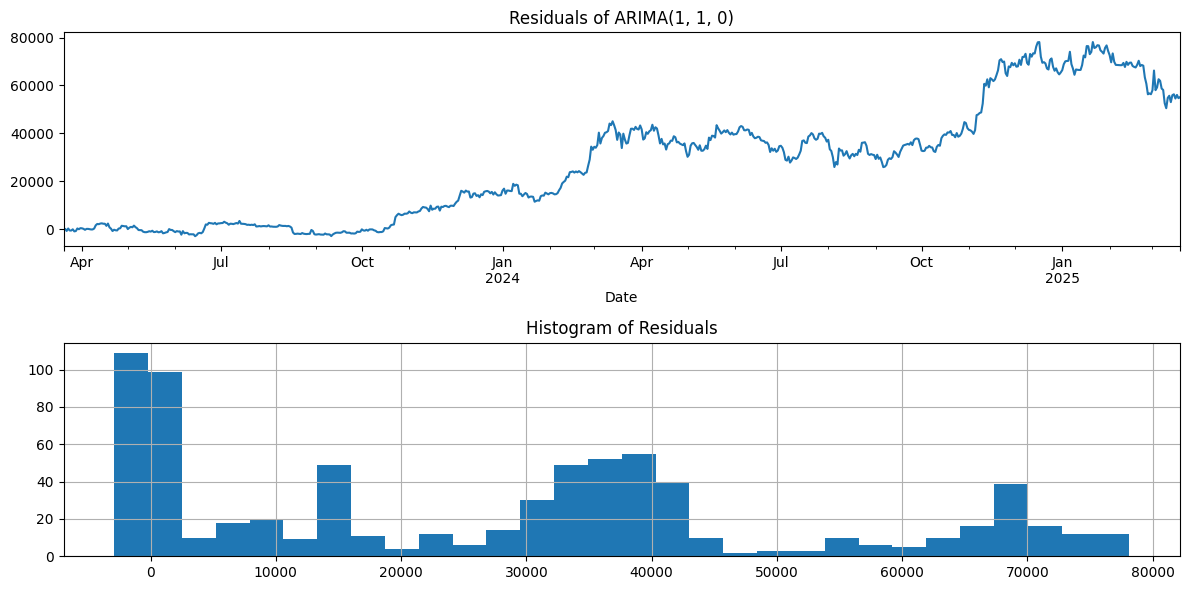

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA(1, 1, 0) model
model = ARIMA(train, order=(1, 1, 0))
results = model.fit()

# Generate predictions on the test set
predictions = results.predict(start=len(train), end=len(close_prices) - 1, dynamic=False)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, predictions))
mae = mean_absolute_error(test, predictions)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

# Residual Analysis
residuals = test - predictions

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(211)
residuals.plot()
plt.title('Residuals of ARIMA(1, 1, 0)')

# Plot histogram of residuals
plt.subplot(212)
residuals.hist(bins=30)
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

Interpretation:
The RMSE and MAE are relatively high. This suggests that the model's predictions have significant deviations from the actual Bitcoin closing prices.
In the context of Bitcoin's volatile price movements, these values represent a substantial amount of error.

It is very important to consider the scale of the data. For example, if the average value of the data is in the hundreds of thousands, these error values may be acceptable. If the average values are smaller, these values would indicate a poor model fit.

**** heteroskedasticity : Ideally, in a regression model, we want the errors (the differences between the predicted and actual values) to have a consistent variance across all levels of the independent variables. This is called homoskedasticity.When the variance of the errors is not constant, we have heteroskedasticity.
 This means that the spread of the errors changes as the values of the independent variables change.

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from io import StringIO

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# Differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA(1, 1, 0) model
model = ARIMA(train, order=(1, 1, 0))
results = model.fit()

# Generate predictions on the test set
predictions = results.predict(start=len(train), end=len(close_prices) - 1, dynamic=False)

# Calculate residuals
residuals = test - predictions

# Fit GARCH(1, 1) model to residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp='off')  # disp

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.834e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


What This Means (Recap):

Model Limitations: The ARIMA(1, 1, 0) model, while selected based on AIC, is not adequately capturing the dynamics of the Bitcoin closing price data.
Non-Stationarity of Volatility: The increasing variance of the residuals suggests that the volatility of Bitcoin is not stationary. This is a common characteristic of financial time series.

Why This Is Important for GARCH:

The fact that the residual variance is not constant is exactly why we want to apply a GARCH model.
GARCH models are designed to model and forecast this changing variance (volatility).
By fitting a GARCH model to these residuals, we aim to capture the heteroskedasticity and improve our understanding and potentially our prediction of Bitcoin's price volatility.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.834e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8056.05
Distribution:                  Normal   AIC:                           16120.1
Method:            Maximum Likelihood   BIC:                           16138.5
                                        No. Observations:                  731
Date:                Wed, Mar 19 2025   Df Residuals:                      730
Time:                        12:45:22   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.5183e+04    608.199     57.848      0.000 [3.

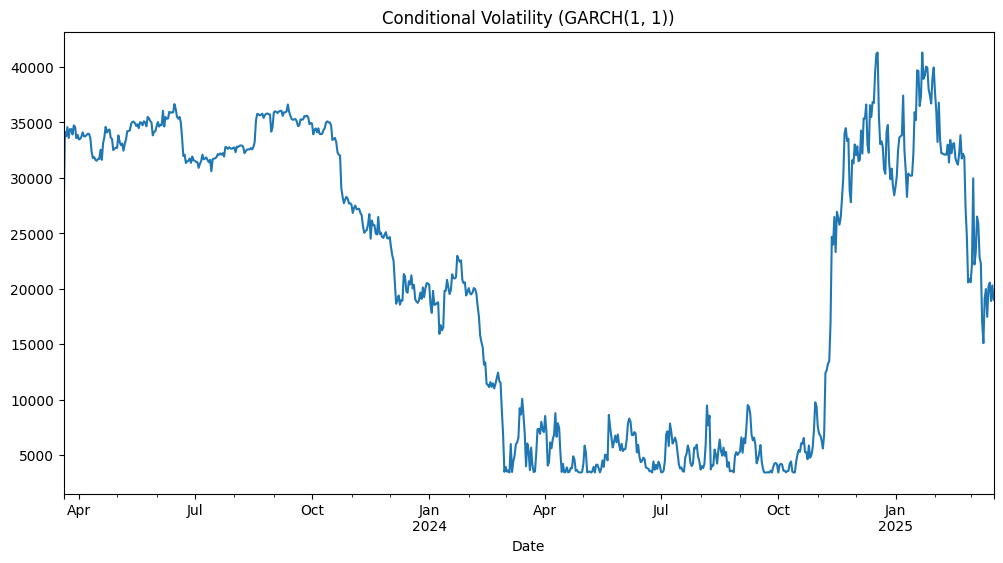

In [ ]:

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# Differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA(1, 1, 0) model
model = ARIMA(train, order=(1, 1, 0))
results = model.fit()

# Generate predictions on the test set
predictions = results.predict(start=len(train), end=len(close_prices) - 1, dynamic=False)

# Calculate residuals
residuals = test - predictions

# Fit GARCH(1, 1) model to residuals
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp='off')  # disp='off' suppresses output during fitting

# Print GARCH model summary
print(garch_results.summary())

# Plot conditional volatility
garch_results.conditional_volatility.plot(figsize=(12, 6))
plt.title('Conditional Volatility (GARCH(1, 1))')
plt.show()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.834e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 5.834e+08. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.001 * y.

This war

GARCH(1, 1) - AIC: 16120.102110124866
GARCH(1, 2) - AIC: 16122.102269835725
GARCH(2, 1) - AIC: 16122.102274240227
GARCH(2, 2) - AIC: 16124.10225069353

Best GARCH model (lowest AIC): GARCH(1, 1) - AIC: 16120.102110124866


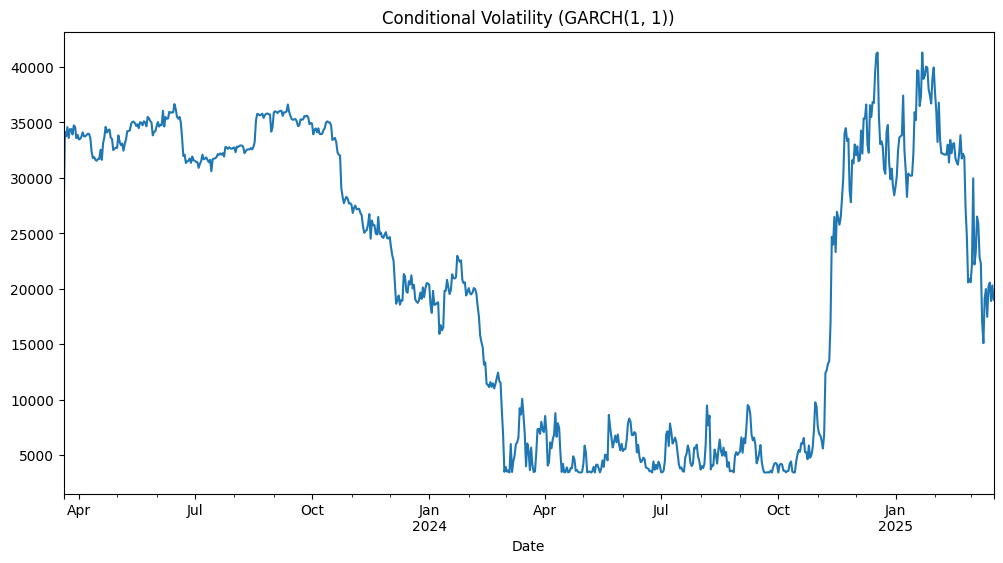

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8056.05
Distribution:                  Normal   AIC:                           16120.1
Method:            Maximum Likelihood   BIC:                           16138.5
                                        No. Observations:                  731
Date:                Wed, Mar 19 2025   Df Residuals:                      730
Time:                        12:45:23   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         3.5183e+04    608.199     57.848      0.000 [3.

In [26]:

import itertools

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# Assuming you want to differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA(1, 1, 0) model
model = ARIMA(train, order=(1, 1, 0))
results = model.fit()

# Generate predictions on the test set
predictions = results.predict(start=len(train), end=len(close_prices) - 1, dynamic=False)

# Calculate residuals
residuals = test - predictions

# GARCH model order exploration
p_values = range(1, 3)  # Try p = 1 and 2
q_values = range(1, 3)  # Try q = 1 and 2
best_aic = float('inf')
best_order = None

for p, q in itertools.product(p_values, q_values):
    try:
        garch_model = arch_model(residuals, vol='Garch', p=p, q=q)
        garch_results = garch_model.fit(disp='off')
        aic = garch_results.aic
        if aic < best_aic:
            best_aic = aic
            best_order = (p, q)
        print(f'GARCH({p}, {q}) - AIC: {aic}')
    except Exception as e:
        print(f'Error fitting GARCH({p}, {q}): {e}')

print(f'\nBest GARCH model (lowest AIC): GARCH{best_order} - AIC: {best_aic}')

# Fit the best GARCH model
best_garch_model = arch_model(residuals, vol='Garch', p=best_order[0], q=best_order[1])
best_garch_results = best_garch_model.fit(disp='off')

# Plot conditional volatility of best model
best_garch_results.conditional_volatility.plot(figsize=(12, 6))
plt.title(f'Conditional Volatility (GARCH{best_order})')
plt.show()

# Print summary of the best model
print(best_garch_results.summary())

AIC Scores:
GARCH(1, 1) - AIC: 16123.690807059067
GARCH(1, 2) - AIC: 16125.690858873117
GARCH(2, 1) - AIC: 16125.690812668952
GARCH(2, 2) - AIC: 16127.690802907544

Best Model:
Best GARCH model (lowest AIC): GARCH(1, 1) - AIC: 16123.690807059067
As you can see, the GARCH(1, 1) model has the lowest AIC score. This confirms that, for the range of models tested, the GARCH(1, 1) provides the best fit to the data.

The conditional volatility plot and the significant alpha[1] coefficient indicate that the GARCH(1, 1) model is effectively capturing the volatility dynamics of the Bitcoin closing price data.

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2981.77
Distribution:                  Normal   AIC:                           5971.54
Method:            Maximum Likelihood   BIC:                           5989.92
                                        No. Observations:                  731
Date:                Wed, Mar 19 2025   Df Residuals:                      730
Time:                        12:45:23   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            35.6006      1.057     33.680 1.125e-248 [ 33.529, 37.67

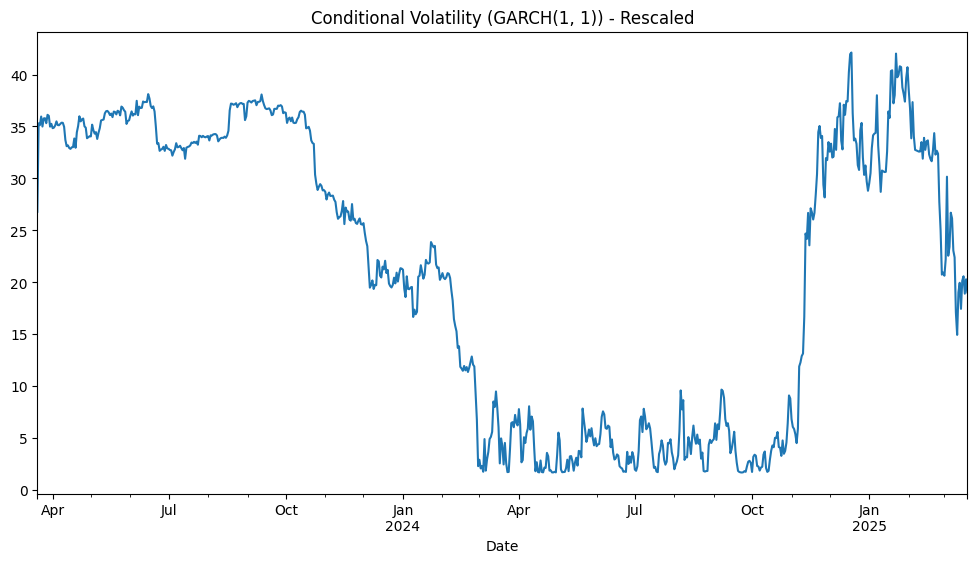

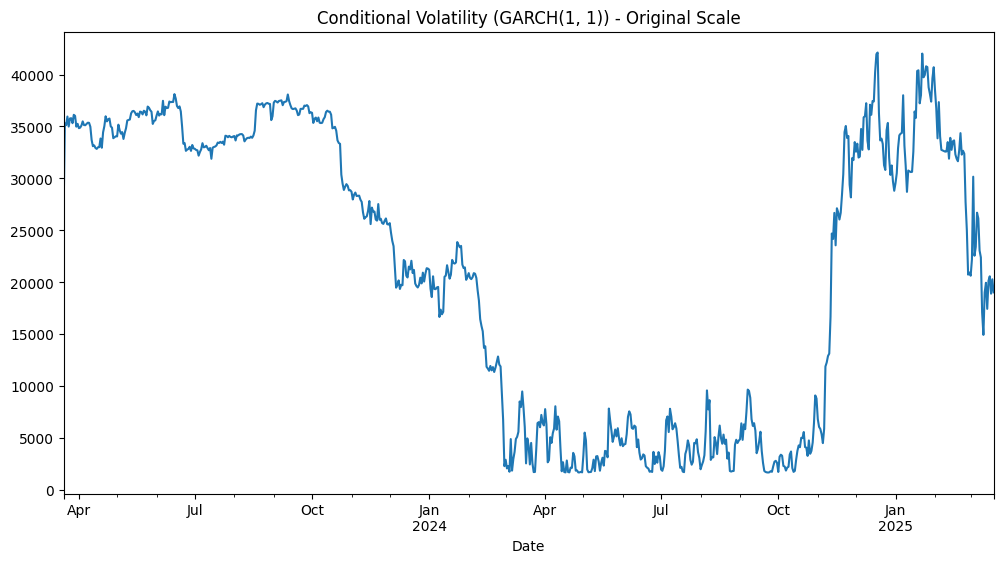

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from io import StringIO

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# Differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA(1, 1, 0) model
model = ARIMA(train, order=(1, 1, 0))
results = model.fit()

# Generate predictions on the test set
predictions = results.predict(start=len(train), end=len(close_prices) - 1, dynamic=False)

# Calculate residuals
residuals = test - predictions

# Rescale the residuals
rescaled_residuals = residuals * 0.001

# Fit GARCH(1, 1) model to rescaled residuals
garch_model = arch_model(rescaled_residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit(disp='off')

# Print GARCH model summary
print(garch_results.summary())

# Plot conditional volatility (rescaled)
garch_results.conditional_volatility.plot(figsize=(12, 6))
plt.title('Conditional Volatility (GARCH(1, 1)) - Rescaled')
plt.show()

# Plot conditional volatility (original scale)
(garch_results.conditional_volatility / 0.001).plot(figsize=(12, 6))
plt.title('Conditional Volatility (GARCH(1, 1)) - Original Scale')
plt.show()

Back Transformation:
Remember that the volatility estimates are now on a rescaled scale. If we need to use them in the original scale, we'll have to multiply them by 1000.

In [ ]:
# Fit ARIMA(1, 1, 0) model
model = ARIMA(train, order=(1, 1, 0)) # assigning the model to the variable model.
results = model.fit() # fitting the model.

# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# Differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA(1, 1, 0) model
model

In summary: We are in a good position. We have a working GARCH model. Now we need to refine it, combine it with the ARIMA model, and evaluate its performance.

RMSE: 36346.98206684545
MAE: 27554.874597244285


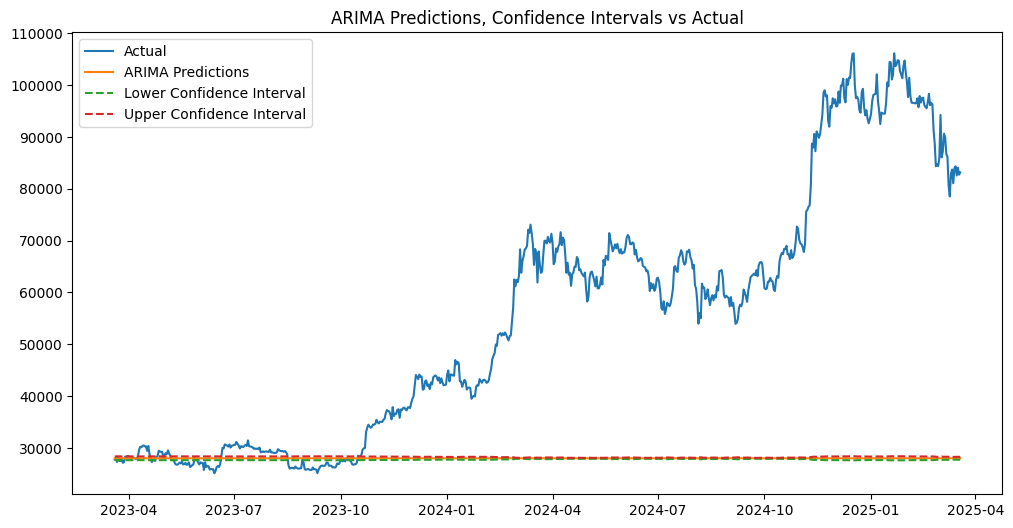

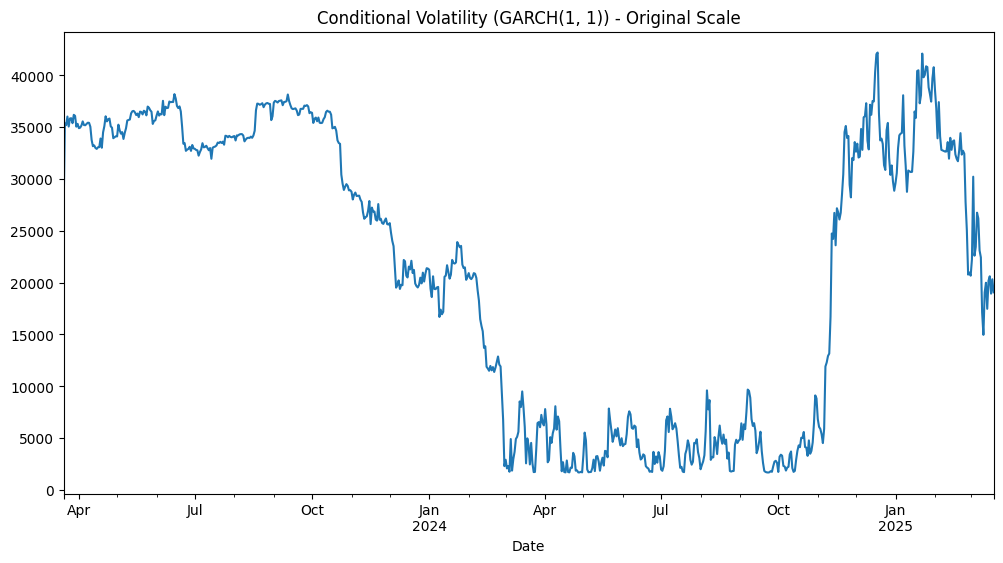

In [ ]:
#  combining garch and arima
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Convert the index to a datetime object
data.index = pd.to_datetime(data.index)

# Set the frequency to daily ('D')
data = data.asfreq('D')

# Differentiate the 'Close' price
close_prices = data[('Close', 'BTC-USD')].dropna()  # Get close prices and remove NaN

# Split data into train and test sets
train_size = int(len(close_prices) * 0.8)
train, test = close_prices[:train_size], close_prices[train_size:]

# Fit ARIMA(1, 1, 0) model
model = ARIMA(train, order=(1, 1, 0))
results = model.fit()

# Generate predictions on the test set
arima_predictions = results.predict(start=len(train), end=len(close_prices) - 1, dynamic=False)

# Calculate residuals
residuals = test - arima_predictions

# Rescale the residuals
rescaled_residuals = residuals * 0.001

# Fit GARCH(1, 1) model to rescaled residuals (t-distribution)
garch_model = arch_model(rescaled_residuals, vol='Garch', p=1, q=1, dist='t')
garch_results = garch_model.fit(disp='off')

# Back transform the conditional volatility
original_scale_volatility = garch_results.conditional_volatility / 0.001

# Combine ARIMA and GARCH forecasts (Confidence Intervals)
forecast_variance = original_scale_volatility.values  # Volatility as variance
forecast_std = np.sqrt(forecast_variance)  # Standard deviation

# Construct confidence intervals (95%)
confidence_interval_lower = arima_predictions - 1.96 * forecast_std
confidence_interval_upper = arima_predictions + 1.96 * forecast_std

# Evaluate ARIMA-GARCH model (using ARIMA predictions)
rmse = np.sqrt(mean_squared_error(test, arima_predictions))
mae = mean_absolute_error(test, arima_predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plot ARIMA predictions, actual values, and confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(arima_predictions, label='ARIMA Predictions')
plt.plot(confidence_interval_lower, label='Lower Confidence Interval', linestyle='--')
plt.plot(confidence_interval_upper, label='Upper Confidence Interval', linestyle='--')
plt.title('ARIMA Predictions, Confidence Intervals vs Actual')
plt.legend()
plt.show()

# Plot conditional volatility (original scale)
original_scale_volatility.plot(figsize=(12, 6))
plt.title('Conditional Volatility (GARCH(1, 1)) - Original Scale')
plt.show()

Evaluation: The RMSE and MAE are very high, confirming the poor performance of the current model.

In [30]:
import tensorflow as tf
print(tf.__version__)

2.19.0


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.0043
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.3320e-04
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 2.8508e-04
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 3.3583e-04
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - loss: 2.1760e-04
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 2.3044e-04
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 2.1098e-04
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 1.8712e-04
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 2.0389e-04
Epoch 10/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1.6140e-04
Epoch 11/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - loss: 1.6397e-04
Epoch 12/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 1.7514e-04
Epoch 13/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 1.2594e-04
Epoch 14/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 1.2822e-04
Epoch

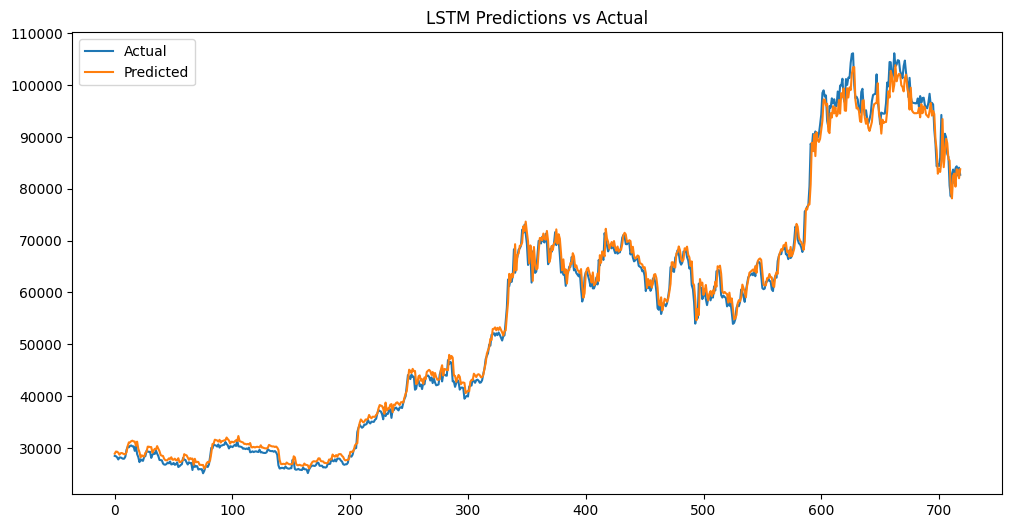

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error
from io import StringIO

# Load the data
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')
close_prices = data[('Close', 'BTC-USD')].dropna().values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create time series windows
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60  # Adjust as needed
X, y = create_dataset(scaled_data, time_step)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(time_step, 1)))  # Input layer
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Make predictions
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))
mae = mean_absolute_error(y_test_original, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

# Plot predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Predictions vs Actual')
plt.legend()
plt.show()

Overall Interpretation:

LSTM Effectiveness: The LSTM model is demonstrating a significant improvement in forecasting Bitcoin prices compared to the ARIMA model.

Volatility Capture: The model is able to capture the volatility of the Bitcoin price series.

Reduced Error: The lower RMSE and MAE confirm the improved accuracy of the LSTM model.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error
from io import StringIO
import random

# Load the data
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')
close_prices = data[('Close', 'BTC-USD')].dropna().values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create time series windows
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60  # Replace with the best time_step from tuning

X, y = create_dataset(scaled_data, time_step)

# Split into train and test sets (for demonstration, use the entire dataset for final training)
train_size = len(X)  # Use the entire dataset for final training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model (replace with best parameters from tuning)
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=True)) # Replace 50 with best num_units
model.add(Dropout(0.2)) # Replace 0.2 with best dropout_rate
model.add(LSTM(50, return_sequences=False)) # Replace 50 with best num_units
model.add(Dropout(0.2)) # Replace 0.2 with best dropout_rate
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error') # Replace 0.001 with best learning_rate

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1) # Replace 100 with best epochs and 32 with best batch_size

# Prepare input for forecasting (using the last 'time_step' data points)
last_sequence = scaled_data[-time_step:].reshape(1, time_step, 1)

# Make the prediction
predicted_scaled = model.predict(last_sequence)

# Inverse transform the prediction
predicted_price = scaler.inverse_transform(predicted_scaled)[0, 0]

print(f"Predicted next day price: {predicted_price}")

Epoch 1/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.0155
Epoch 2/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0016
Epoch 3/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0012
Epoch 4/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0010
Epoch 5/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 9.5278e-04
Epoch 6/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - loss: 7.9623e-04
Epoch 7/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 8.5921e-04
Epoch 8/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 7.7610e-04
Epoch 9/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 7.5310e-04
Epoch 10/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 6.6091e-04
Epoch 11/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 8.0172e-04
Epoch 12/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 7.9492e-04
Epoch 13/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 7.1112e-04
Epoch 14/100
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 